In [8]:
import pandas as pd
import os
import glob

folder_path = "data"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Remove channel-level summary file
csv_files = [f for f in csv_files if "channels_summary" not in f.lower()]

df_list = []
for f in csv_files:
    print("Loading:", f)
    df_list.append(pd.read_csv(f))

df = pd.concat(df_list, ignore_index=True)

df = df.fillna("")

# Genre dictionary

genres = {
    "Rescue/Adoption": ["rescue", "adopted", "stray", "shelter", "feral", "foster", "homeless", "saved", "found", "abandoned", "rehome", "street cat", "lost", "missing"],
    "Funny/Comedy": ["funny", "hilarious", "compilation", "fails", "zoomies", "weird", "chaos", "silly", "goofy", "crazy", "derp", "bloopers", "moments", "reaction", "meme", "lol", "haha", "comedy", "prank", "jump scare", "accidentally", "oops", "drama", "dramatic", "dumb", "stupid", "clumsy"],
    "Talking Cats": ["talking", "meow", "conversation", "voice", "chatty", "yelling", "screaming", "chirp", "trill", "yowl", "purr", "hiss", "growl", "vocal", "whisper", "scream", "cry", "crying"],
    "Travel/Adventure": ["travel", "outdoor", "adventure", "hiking", "car", "road trip", "walk", "explore", "vacation", "camping", "beach", "park", "outside", "garden", "backyard", "window", "balcony"],
    "Daily Life/Vlog": ["morning", "routine", "day", "vlog", "daily", "cleaning", "life", "update", "week", "month", "night", "bedtime", "wake up", "typical", "hour", "home", "house", "room", "living"],
    "Food/Treats": ["eating", "food", "treats", "dinner", "feeding", "snack", "meal", "hungry", "eat", "nom", "feast", "breakfast", "lunch", "kibble", "wet food", "cooking", "cook", "chef", "recipe", "crunch", "crunching", "cruncher", "munch", "bite", "chew"],
    "Cute/Adorable": ["cute", "adorable", "sweet", "precious", "baby", "tiny", "little", "aww", "cuddle", "snuggl", "fluffy", "soft", "sleepy", "nap", "cozy", "love", "lovely", "beautiful", "pretty", "gorgeous", "handsome", "photogenic", "angel", "sweetheart", "heart"],
    "Kittens": ["kitten", "kitty", "baby cat", "newborn", "weeks old", "months old", "growing", "litter", "mama cat", "nursing", "小猫", "子猫"],
    "Playing/Toys": ["play", "toy", "chase", "laser", "feather", "ball", "hunt", "pounce", "attack", "catch", "mouse", "string", "game", "jump", "jumping", "leap", "bounce", "run", "running", "sprint"],
    "Training/Tips": ["train", "tip", "how to", "tutorial", "guide", "advice", "learn", "teach", "behavior", "trick", "command", "obedient", "stop", "prevent", "why does", "why do"],
    "Health/Grooming": ["health", "groom", "vet", "brush", "bath", "nail", "teeth", "sick", "medic", "pill", "injection", "fur", "shed", "hairball", "clean", "condition", "diagnose", "doctor", "hospital", "surgery", "neuter", "spay", "vaccine"],
    "Multi-Cat/Friends": ["cats", "brothers", "sisters", "friends", "together", "duo", "trio", "gang", "crew", "meet", "introduce", "bond", "sibling", "family", "squad", "group", "pair"],
    "ASMR/Relaxing": ["asmr", "relax", "calm", "soothing", "sleep", "peaceful", "zen", "chill", "ambient", "white noise", "purring", "satisfying", "therapeutic"],
    "Breeds/Species": ["maine coon", "siamese", "persian", "bengal", "ragdoll", "british shorthair", "scottish fold", "sphynx", "tabby", "tuxedo", "calico", "orange", "ginger", "black cat", "white cat", "manx", "abyssinian", "birman", "himalayan", "russian blue", "munchkin"],
    "Emotions/Reactions": ["jealous", "angry", "mad", "scared", "afraid", "happy", "sad", "excited", "confused", "surprised", "shocked", "annoyed", "grumpy", "moody", "sassy", "attitude"],
    "Christmas/Holiday": ["christmas", "holiday", "xmas", "halloween", "thanksgiving", "easter", "valentine", "birthday", "new year", "celebration", "gift", "present", "costume", "dress up"],
    "Product Reviews": ["review", "unbox", "product", "purifier", "fountain", "litter box", "carrier", "bed", "scratch", "tree", "tower", "recommend", "best", "worth"],
    "Shorts/Clips": ["short", "shorts", "clip", "moment", "quick", "brief", "instant", "second", "#shorts"],
    "International": ["可愛い", "ペット", "動物", "子猫", "猫", "gato", "chat", "katze", "кот", "кошка", "고양이", "แมว", "kucing", "mèo", "neko"],
}

# Assign genres
def assign_genres(row):
    text = " ".join([
        str(row["title"]),
        str(row["description"]),
        str(row["tags"]),
        str(row["hashtags"]),
    ]).lower()

    matched = [g for g, words in genres.items() if any(w in text for w in words)]
    return ", ".join(matched) if matched else "Uncategorized"

df["genres"] = df.apply(assign_genres, axis=1)

# Save output
output_path = os.path.join(folder_path, "videos_with_genres.csv")
df.to_csv(output_path, index=False)
print("Saved:", output_path)

# Show how many are still uncategorized
uncategorized_count = (df["genres"] == "Uncategorized").sum()
total_count = len(df)
print(f"\nUncategorized: {uncategorized_count} / {total_count} ({uncategorized_count/total_count*100:.1f}%)")

Loading: data/The_Meow_Show.csv
Loading: data/TakeYourDoseOfCats.csv
Loading: data/Chip_The_Manx.csv
Loading: data/Little_Love.csv
Loading: data/DailyDoseOfInternetCats.csv
Loading: data/OwlKitty.csv
Loading: data/FunnyPaws.csv
Loading: data/cats101.csv
Loading: data/Princess_Nika_cat.csv
Loading: data/Walter_the_Catt.csv
Loading: data/CatPusic_Team.csv
Loading: data/Cole_and_Marmalade.csv
Loading: data/Crunchycat.csv
Loading: data/videos_with_genres.csv
Loading: data/Meowphorius.csv
Loading: data/Funny_And_Cute_Cats_Life.csv
Loading: data/Purrfect_Pets.csv
Loading: data/el_Cato.csv
Loading: data/CAT_MAN_CHRIS.csv
Loading: data/Feeding_Street_Cats.csv
Loading: data/catmp4.csv
Loading: data/Pawsome_Cats_of_the_Internet.csv
Loading: data/Chef_Cat_ChangAn.csv
Loading: data/funcatflicks.csv
Loading: data/Renus_Delph.csv
Loading: data/CaD_Animals.csv
Loading: data/Maine_Coon_Kittens.csv
Loading: data/Dexter_The_Cat.csv
Loading: data/Tasty_Paws.csv
Saved: data/videos_with_genres.csv

Uncateg

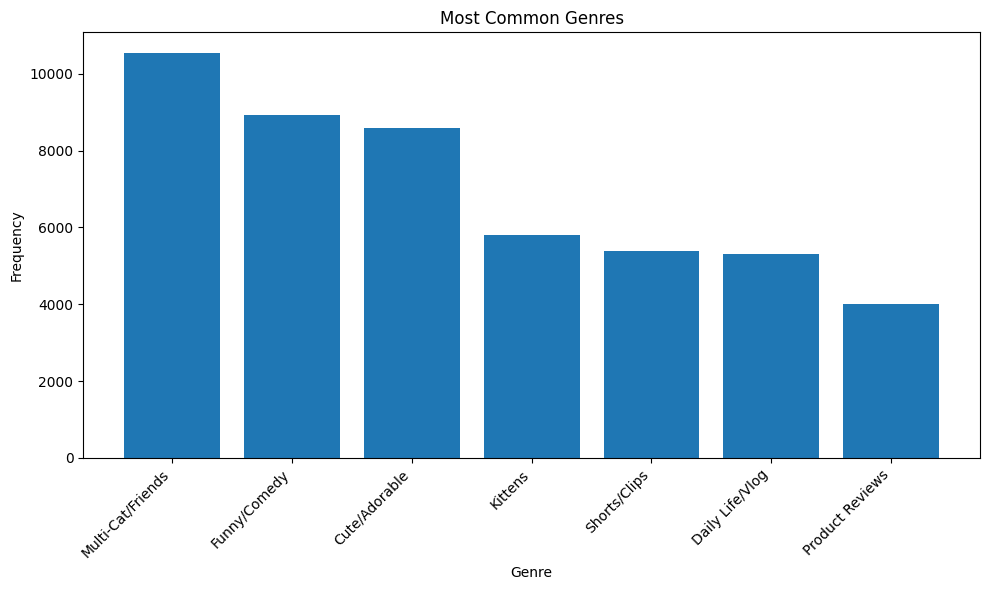

In [9]:
import matplotlib.pyplot as plt
import os

# Create graphs folder if it doesn't exist
os.makedirs("graphs", exist_ok=True)

if "genres" not in df.columns:
    raise ValueError("No genres found")


# Split multi-genre rows

all_genres = []

for entry in df["genres"]:
    if isinstance(entry, str):
        for g in entry.split(","):
            g = g.strip()
            if g:
                all_genres.append(g)

# Count genre frequency

from collections import Counter
genre_counts = Counter(all_genres)

# Get top N genres

top_n = 7
top_genres = genre_counts.most_common(top_n)

labels = [g for g, _ in top_genres]
counts = [c for _, c in top_genres]

# Plot

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("graphs/most_common_genres.png", dpi=150)
plt.show()

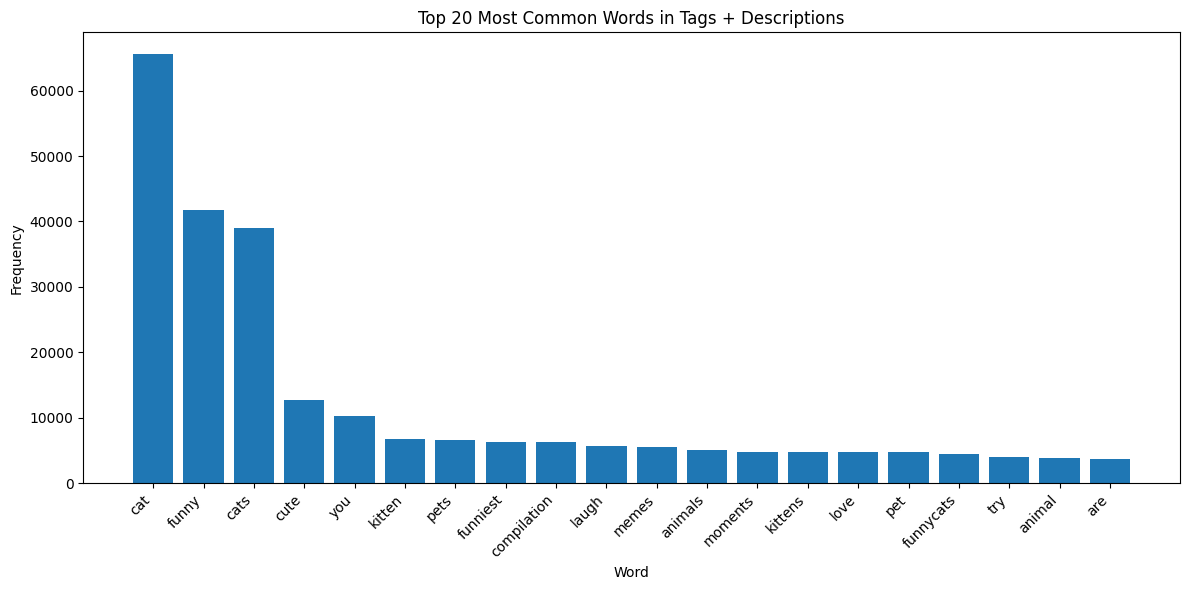

In [10]:
import matplotlib.pyplot as plt
import re
from collections import Counter



# Combine tags + description text

df_clean = df.fillna("")
text_data = df_clean["tags"].astype(str) + " " + df_clean["description"].astype(str)


# Clean text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

cleaned = text_data.apply(clean_text)

# Count words

all_words = " ".join(cleaned).split()

stopwords = {
    "the","and","a","to","in","of","for","is","on","with","my",
    "at","this","that","it","me","our","your","we","as","from", "www", "https", "youtube", "com", "s", "video", "not", "videos", "t",
}

filtered_words = [w for w in all_words if w not in stopwords]
word_counts = Counter(filtered_words)

# Get top 20

top_words = word_counts.most_common(20)
words = [w for w, _ in top_words]
counts = [c for _, c in top_words]


# Plot

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Common Words in Tags + Descriptions")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("graphs/top_words_tags_descriptions.png", dpi=150)
plt.show()

In [11]:
from collections import Counter
import re

def most_common_tags(genre_name, top_n=10):
    # Filter by genre
    subset = df[df["genres"].str.contains(genre_name, na=False)]
    
    # Combine all tags
    all_tags = subset["tags"].astype(str).str.lower().str.cat(sep=" ")
    
    # Split and clean
    words = re.findall(r'\w+', all_tags)
    
    counter = Counter(words)
    return counter.most_common(top_n)


print("Top tags in Rescue/Adoption:", most_common_tags("Rescue/Adoption"))
print("Top tags in Funny/Comedy:", most_common_tags("Funny/Comedy"))
print("Top tags in Talking Cats:", most_common_tags("Talking Cats"))
print("Top tags in Travel/Adventure:", most_common_tags("Travel/Adventure"))
print("Top tags in Daily Life/Vlog:", most_common_tags("Daily Life/Vlog"))
print("Top tags in Food/Treats:", most_common_tags("Food/Treats"))

Top tags in Rescue/Adoption: [('cat', 7360), ('kitten', 2270), ('kittens', 1890), ('stray', 1870), ('rescue', 1800), ('cats', 1610), ('cute', 1530), ('feeding', 840), ('paws', 740), ('meow', 730)]
Top tags in Funny/Comedy: [('cat', 39030), ('funny', 27620), ('cats', 21550), ('videos', 15410), ('cute', 8310), ('video', 4980), ('memes', 4690), ('pets', 4230), ('compilation', 3960), ('and', 3850)]
Top tags in Talking Cats: [('cat', 22190), ('funny', 11010), ('cats', 8260), ('videos', 7080), ('cute', 5240), ('kitten', 3050), ('kittens', 2370), ('video', 2190), ('and', 1840), ('dog', 1820)]
Top tags in Travel/Adventure: [('cat', 9080), ('funny', 5510), ('cats', 4240), ('videos', 2450), ('and', 2330), ('cute', 2230), ('video', 1310), ('life', 1250), ('kitten', 1020), ('animals', 960)]
Top tags in Daily Life/Vlog: [('cat', 25750), ('cats', 13330), ('funny', 12880), ('videos', 6250), ('cute', 5440), ('and', 3410), ('video', 3060), ('kitten', 2560), ('animals', 2550), ('kittens', 2360)]
Top tag

                 title         genres  view_count  like_count  comment_count  \
7000   This bothers me  Uncategorized       12692        4347            175   
13750  This bothers me  Uncategorized       12692        4347            175   
10750  This bothers me  Uncategorized       12692        4347            175   
13000  This bothers me  Uncategorized       12692        4347            175   
11500  This bothers me  Uncategorized       12692        4347            175   
8500   This bothers me  Uncategorized       12692        4347            175   
9250   This bothers me  Uncategorized       12692        4347            175   
7750   This bothers me  Uncategorized       12692        4347            175   
12250  This bothers me  Uncategorized       12692        4347            175   
10000  This bothers me  Uncategorized       12692        4347            175   

       engagement_rate  
7000          0.356287  
13750         0.356287  
10750         0.356287  
13000         0.356

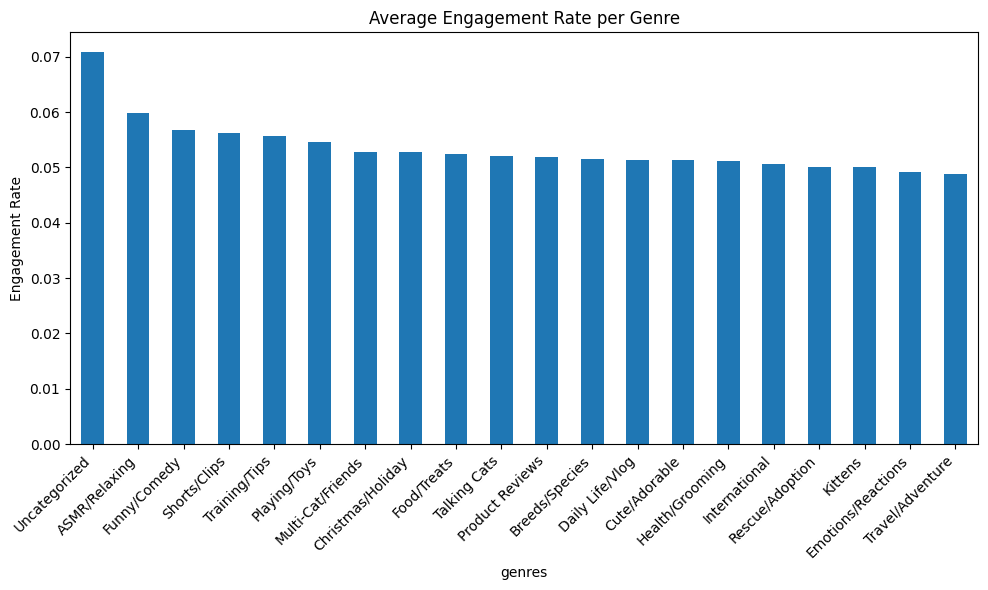

In [12]:
import pandas as pd

# Ensure numeric
for col in ["view_count", "like_count", "comment_count"]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Compute engagement rate
df["engagement_rate"] = (df["like_count"] + df["comment_count"]) / df["view_count"]
df["engagement_rate"] = df["engagement_rate"].fillna(0)

# Top 10 videos by engagement
top_engagement = df.sort_values("engagement_rate", ascending=False)[
    ["title", "genres", "view_count", "like_count", "comment_count", "engagement_rate"]
].head(10)
print(top_engagement)

# Average engagement per genre (handles multi-genres)
df_exploded = df.copy()
df_exploded["genres"] = df_exploded["genres"].str.split(",").explode("genres").str.strip()
avg_engagement_per_genre = df_exploded.groupby("genres")["engagement_rate"].mean().sort_values(ascending=False)
print(avg_engagement_per_genre)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_engagement_per_genre.plot(kind="bar")
plt.title("Average Engagement Rate per Genre")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("graphs/avg_engagement_per_genre.png", dpi=150)
plt.show()

ENGAGEMENT METRICS PER GENRE
            genres    avg_views     avg_likes  total_views  total_likes  total_comments  video_count  like_to_view_ratio  comment_to_view_ratio
     ASMR/Relaxing 1.597404e+05   5007.868132    290727440      9114320          305280         1820            0.031350               0.001050
    Breeds/Species 5.899162e+05  20705.045752   1805143640     63357440         1256040         3060            0.035098               0.000696
 Christmas/Holiday 5.324382e+06 139718.000000   2289484410     60078740          884520          430            0.026241               0.000386
     Cute/Adorable 1.919445e+06  37799.537209  16507223420    325076020         2466660         8600            0.019693               0.000149
   Daily Life/Vlog 6.741629e+05  18233.945386   3579805150     96822250         1253260         5310            0.027047               0.000350
Emotions/Reactions 2.188181e+06  42610.006623   3304154010     64341110          448400         1510       

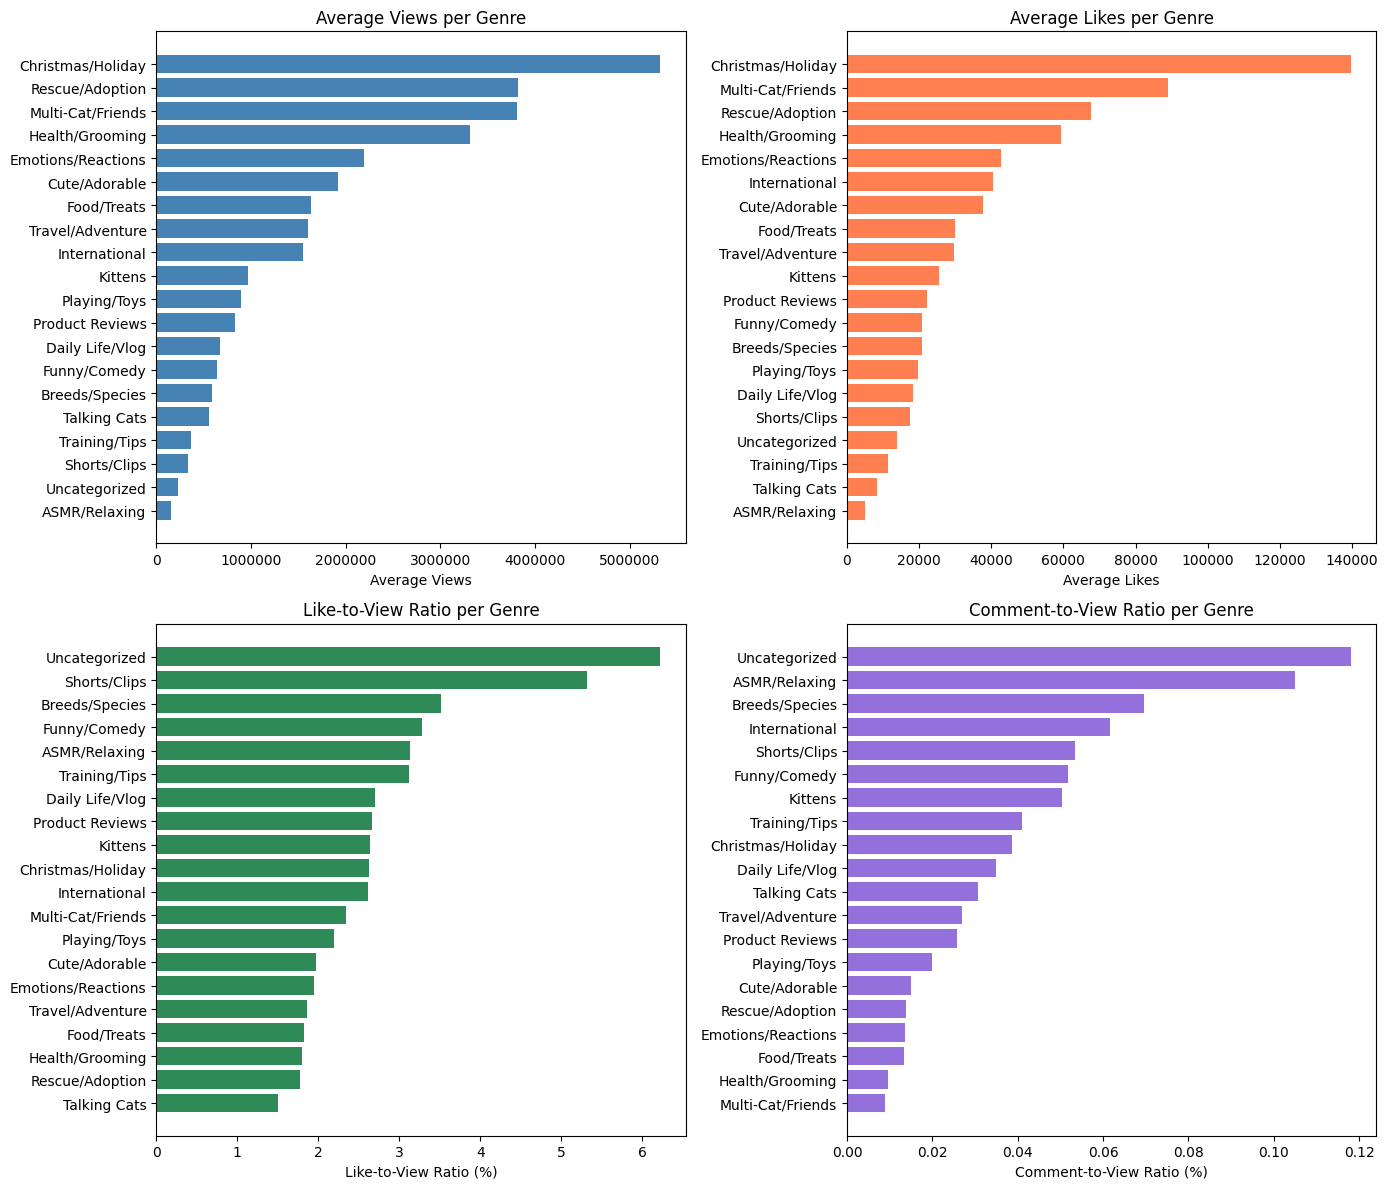


SUMMARY: ENGAGEMENT RATIOS
            genres  avg_views  avg_likes like_to_view_ratio comment_to_view_ratio
     ASMR/Relaxing     159740       5008              3.14%                0.105%
    Breeds/Species     589916      20705              3.51%               0.0696%
 Christmas/Holiday    5324382     139718              2.62%               0.0386%
     Cute/Adorable    1919445      37800              1.97%               0.0149%
   Daily Life/Vlog     674163      18234               2.7%                0.035%
Emotions/Reactions    2188181      42610              1.95%               0.0136%
       Food/Treats    1634447      29883              1.83%               0.0133%
      Funny/Comedy     636499      20864              3.28%               0.0517%
   Health/Grooming    3315926      59421              1.79%               0.0097%
     International    1548419      40530              2.62%               0.0616%
           Kittens     972256      25600              2.63%           

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode genres for per-genre analysis
df_genre_exploded = df.copy()
df_genre_exploded["genres"] = df_genre_exploded["genres"].str.split(",")
df_genre_exploded = df_genre_exploded.explode("genres")
df_genre_exploded["genres"] = df_genre_exploded["genres"].str.strip()

# Calculate engagement metrics per genre
engagement_metrics = df_genre_exploded.groupby("genres").agg(
    avg_views=("view_count", "mean"),
    avg_likes=("like_count", "mean"),
    total_views=("view_count", "sum"),
    total_likes=("like_count", "sum"),
    total_comments=("comment_count", "sum"),
    video_count=("view_count", "count")
).reset_index()

# Calculate ratios
engagement_metrics["like_to_view_ratio"] = engagement_metrics["total_likes"] / engagement_metrics["total_views"]
engagement_metrics["comment_to_view_ratio"] = engagement_metrics["total_comments"] / engagement_metrics["total_views"]

# Handle division by zero
engagement_metrics = engagement_metrics.fillna(0)

print("=" * 60)
print("ENGAGEMENT METRICS PER GENRE")
print("=" * 60)
print(engagement_metrics.to_string(index=False))

# Plot 1: Average Views per Genre
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Average Views
ax1 = axes[0, 0]
metrics_sorted = engagement_metrics.sort_values("avg_views", ascending=True)
ax1.barh(metrics_sorted["genres"], metrics_sorted["avg_views"], color="steelblue")
ax1.set_xlabel("Average Views")
ax1.set_title("Average Views per Genre")
ax1.ticklabel_format(style='plain', axis='x')

# Average Likes
ax2 = axes[0, 1]
metrics_sorted = engagement_metrics.sort_values("avg_likes", ascending=True)
ax2.barh(metrics_sorted["genres"], metrics_sorted["avg_likes"], color="coral")
ax2.set_xlabel("Average Likes")
ax2.set_title("Average Likes per Genre")
ax2.ticklabel_format(style='plain', axis='x')

# Like-to-View Ratio
ax3 = axes[1, 0]
metrics_sorted = engagement_metrics.sort_values("like_to_view_ratio", ascending=True)
ax3.barh(metrics_sorted["genres"], metrics_sorted["like_to_view_ratio"] * 100, color="seagreen")
ax3.set_xlabel("Like-to-View Ratio (%)")
ax3.set_title("Like-to-View Ratio per Genre")

# Comment-to-View Ratio
ax4 = axes[1, 1]
metrics_sorted = engagement_metrics.sort_values("comment_to_view_ratio", ascending=True)
ax4.barh(metrics_sorted["genres"], metrics_sorted["comment_to_view_ratio"] * 100, color="mediumpurple")
ax4.set_xlabel("Comment-to-View Ratio (%)")
ax4.set_title("Comment-to-View Ratio per Genre")

plt.tight_layout()
plt.savefig("graphs/engagement_metrics_per_genre.png", dpi=150)
plt.show()

# Summary table
print("\n" + "=" * 60)
print("SUMMARY: ENGAGEMENT RATIOS")
print("=" * 60)
summary = engagement_metrics[["genres", "avg_views", "avg_likes", "like_to_view_ratio", "comment_to_view_ratio"]].copy()
summary["like_to_view_ratio"] = (summary["like_to_view_ratio"] * 100).round(2).astype(str) + "%"
summary["comment_to_view_ratio"] = (summary["comment_to_view_ratio"] * 100).round(4).astype(str) + "%"
summary["avg_views"] = summary["avg_views"].round(0).astype(int)
summary["avg_likes"] = summary["avg_likes"].round(0).astype(int)
print(summary.to_string(index=False))

Detected genres: ['ASMR/Relaxing', 'Breeds/Species', 'Christmas/Holiday', 'Cute/Adorable', 'Daily Life/Vlog', 'Emotions/Reactions', 'Food/Treats', 'Funny/Comedy', 'Health/Grooming', 'International', 'Kittens', 'Multi-Cat/Friends', 'Playing/Toys', 'Product Reviews', 'Rescue/Adoption', 'Shorts/Clips', 'Talking Cats', 'Training/Tips', 'Travel/Adventure', 'Uncategorized']


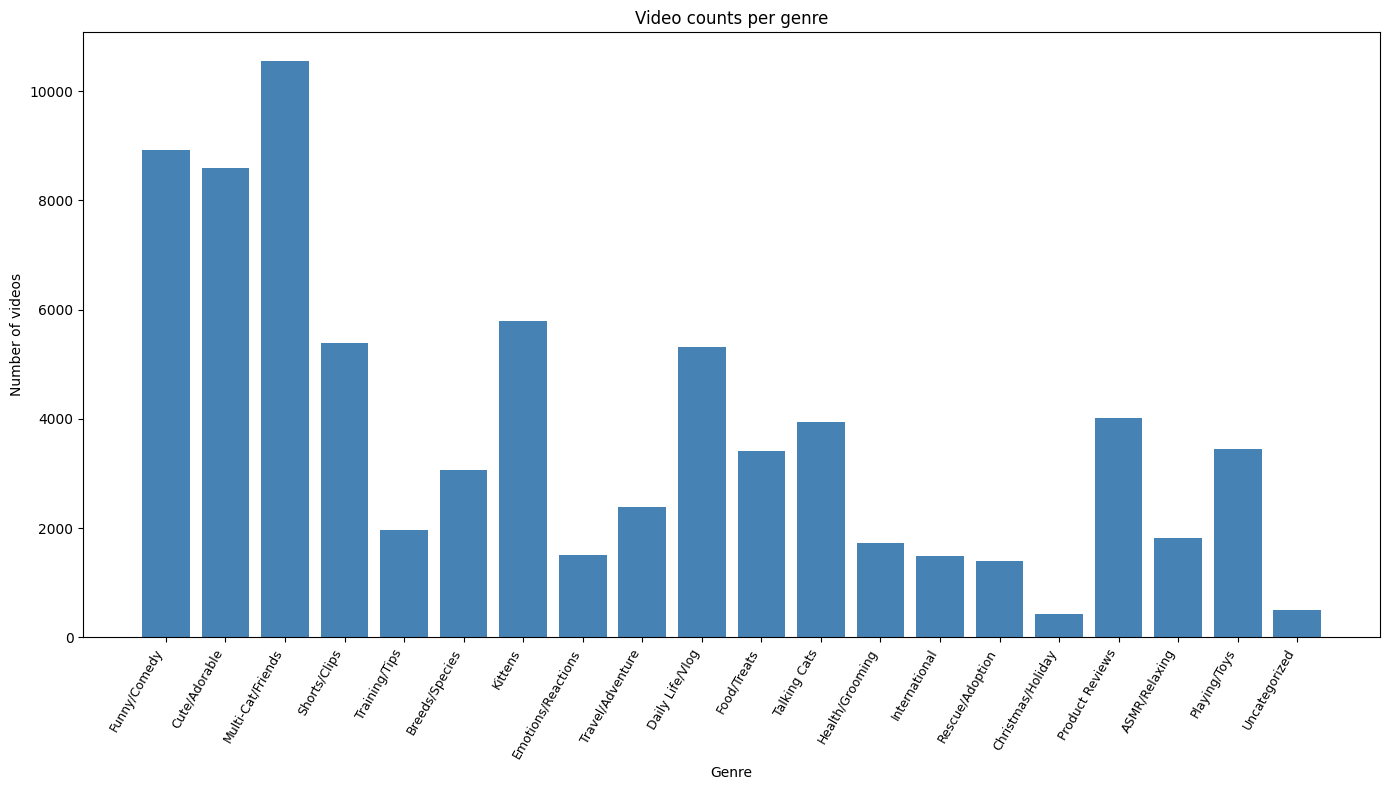

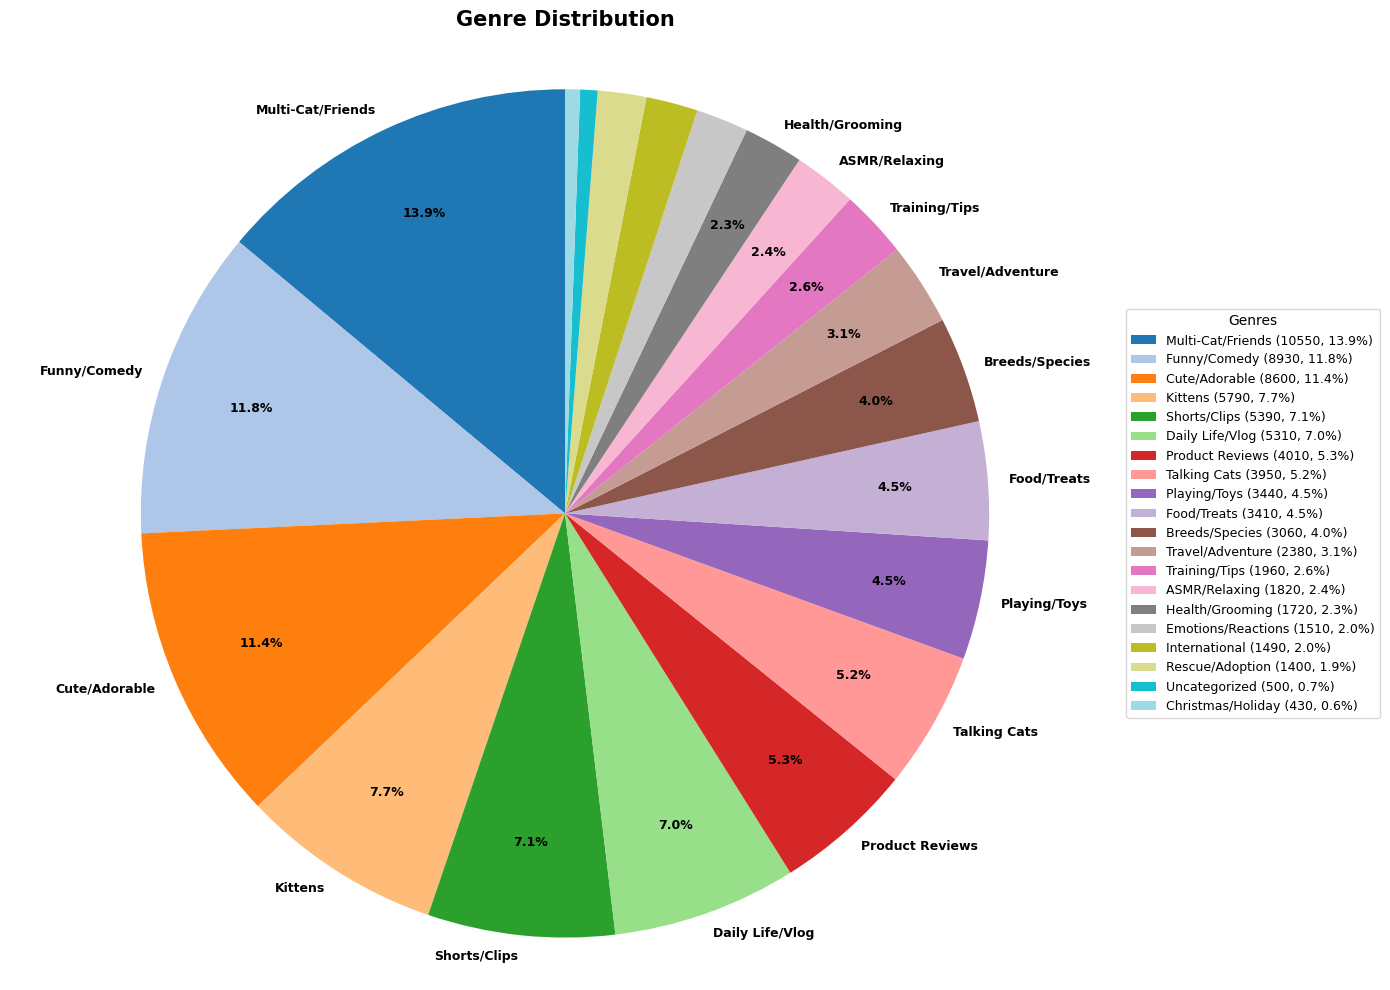


Average clustering coefficient (weighted): 0.13233499401799623

Top genres by betweenness centrality:
  Christmas/Holiday: 0.8392
  International: 0.0643
  ASMR/Relaxing: 0.0000
  Breeds/Species: 0.0000
  Cute/Adorable: 0.0000
  Daily Life/Vlog: 0.0000
  Emotions/Reactions: 0.0000
  Food/Treats: 0.0000
  Funny/Comedy: 0.0000
  Health/Grooming: 0.0000
  Kittens: 0.0000
  Multi-Cat/Friends: 0.0000
  Playing/Toys: 0.0000
  Product Reviews: 0.0000
  Rescue/Adoption: 0.0000
  Shorts/Clips: 0.0000
  Talking Cats: 0.0000
  Training/Tips: 0.0000
  Travel/Adventure: 0.0000
  Uncategorized: 0.0000

Top genres by degree centrality:
  ASMR/Relaxing: 0.9474
  Breeds/Species: 0.9474
  Christmas/Holiday: 0.9474
  Cute/Adorable: 0.9474
  Daily Life/Vlog: 0.9474
  Emotions/Reactions: 0.9474
  Food/Treats: 0.9474
  Funny/Comedy: 0.9474
  Health/Grooming: 0.9474
  International: 0.9474

Top genres by weighted degree:
  Multi-Cat/Friends: 55890
  Cute/Adorable: 50520
  Funny/Comedy: 48210
  Daily Life/Vl

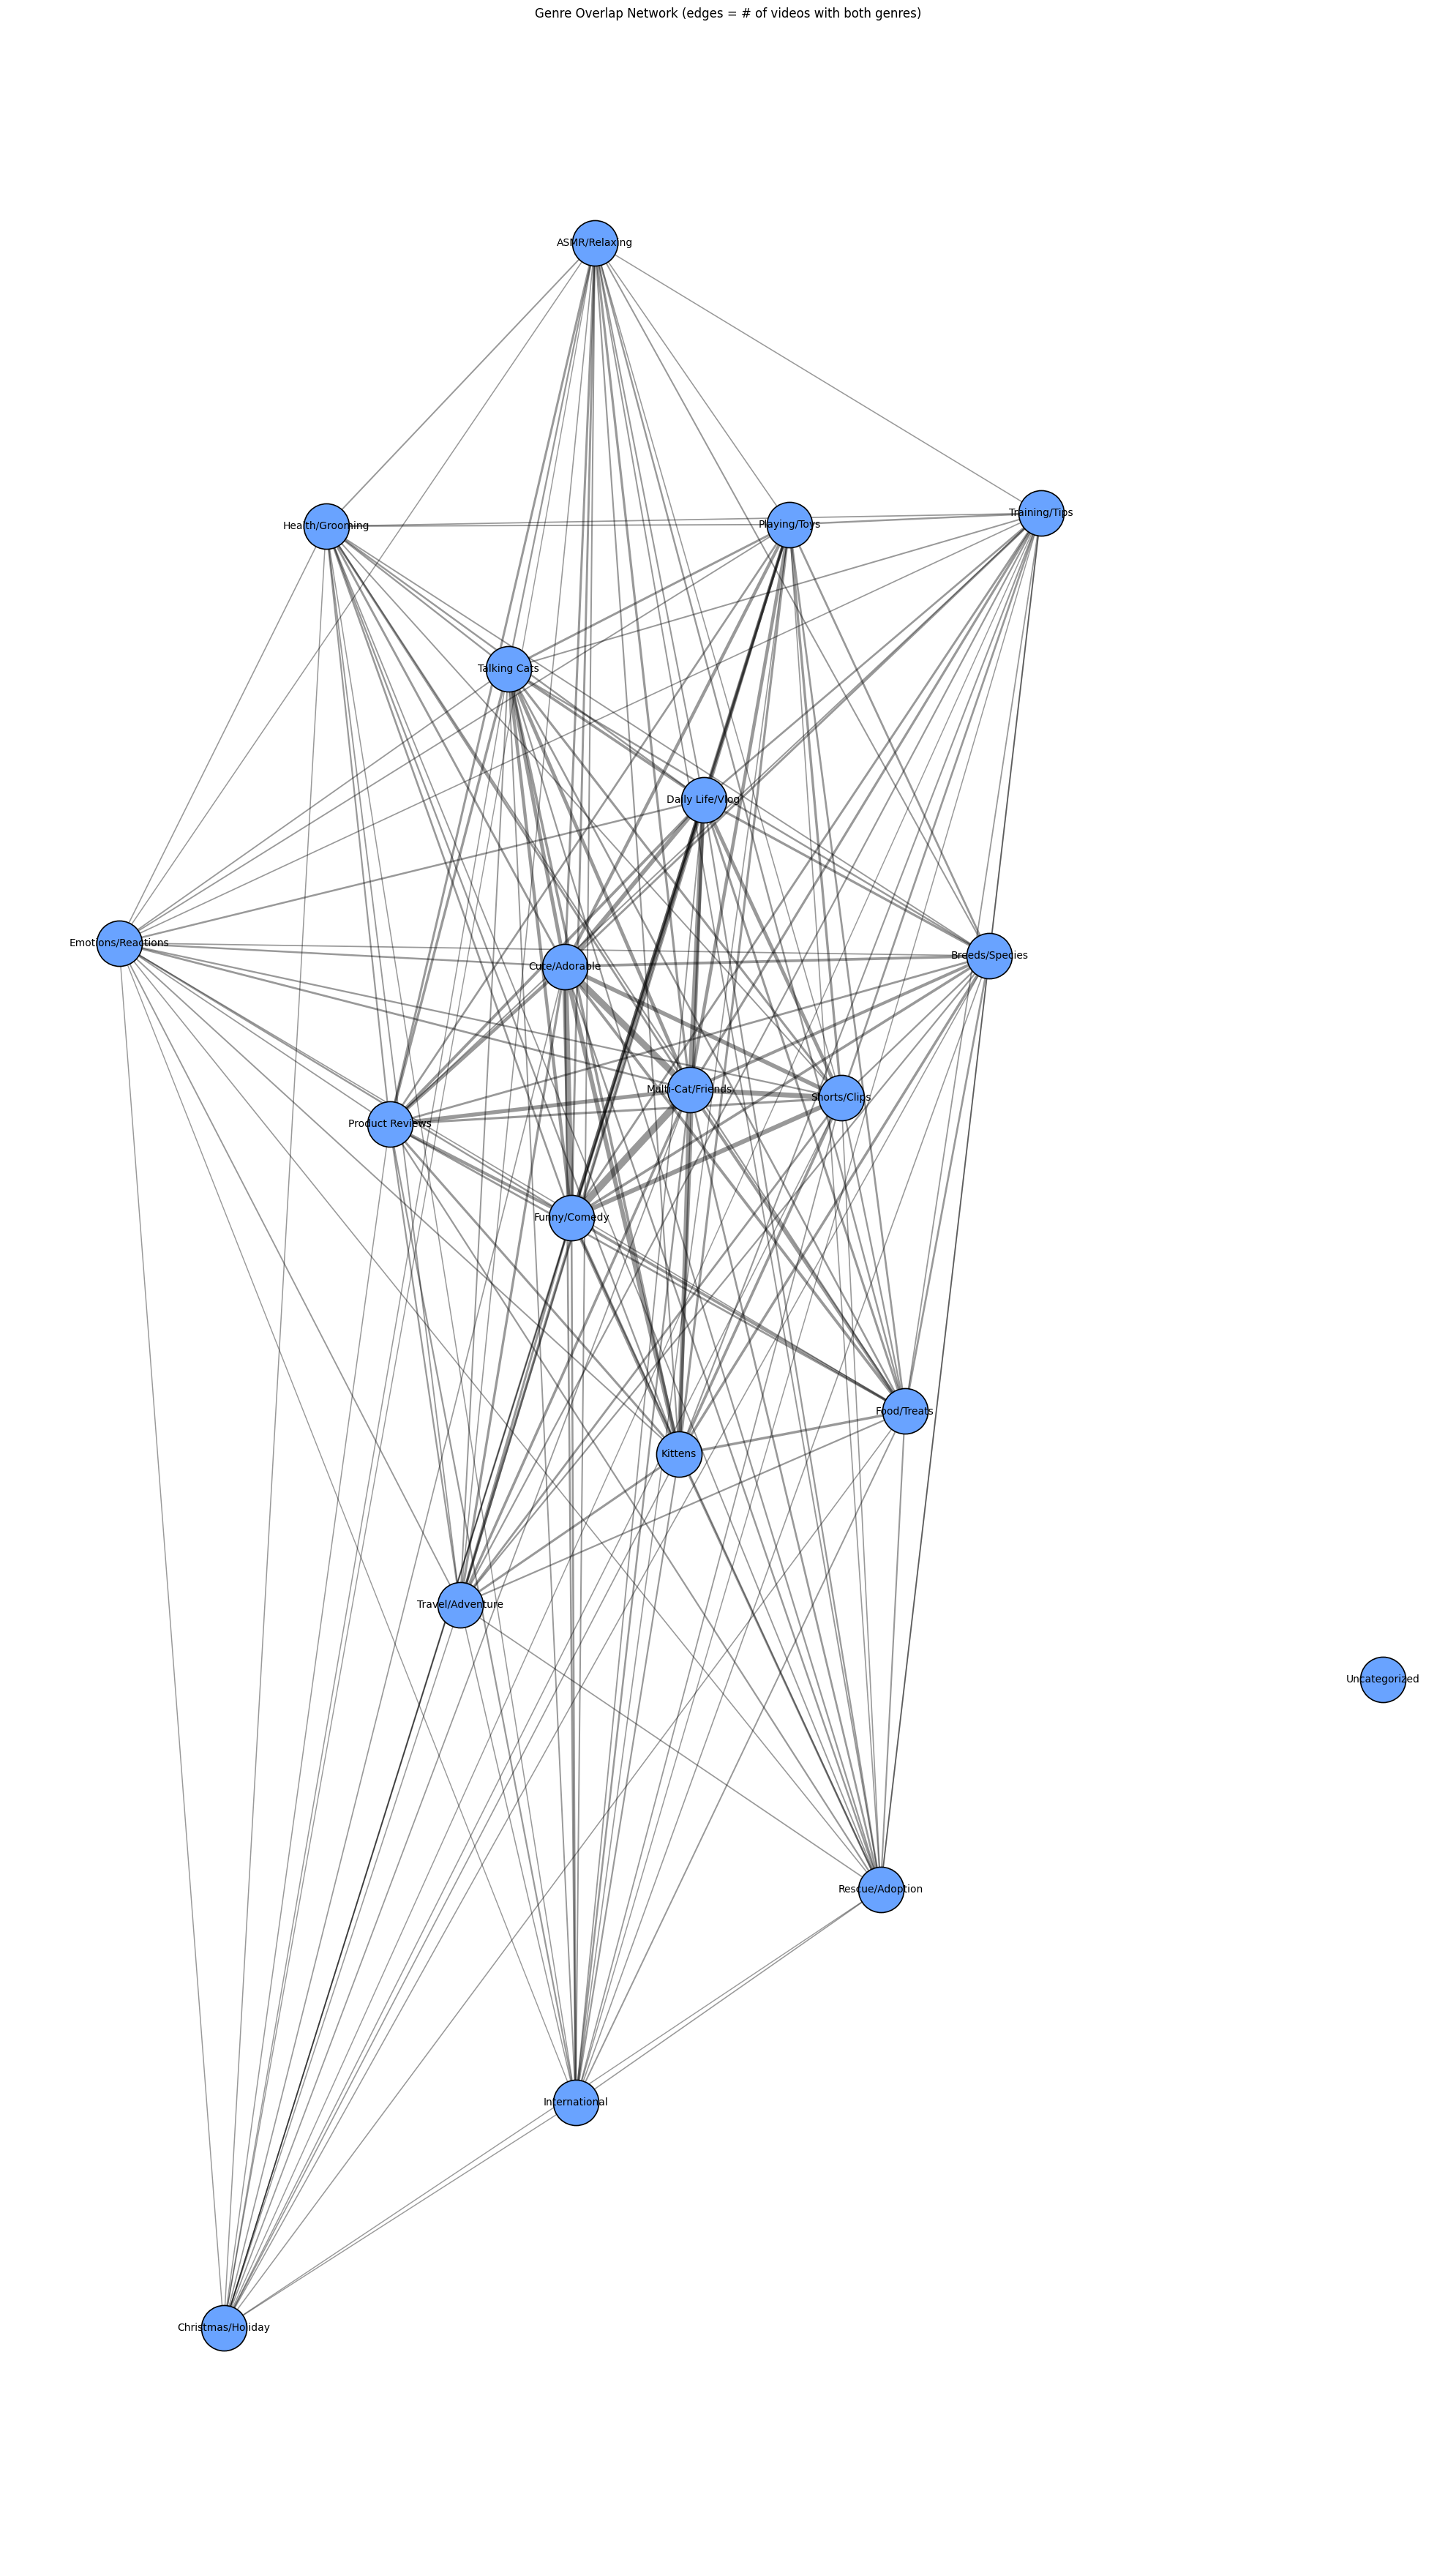

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from collections import Counter, defaultdict

assert "genres" in df.columns, "DataFrame must have a 'genres' column."

# Convert genre cell to a cleaned list for each row
def parse_genre_cell(cell):
    if isinstance(cell, list):
        return [g.strip() for g in cell if g and str(g).strip()]
    if pd.isna(cell) or str(cell).strip() == "":
        return []
    parts = [p.strip() for p in str(cell).split(",") if p.strip()]
    return parts

df["genres_list"] = df["genres"].apply(parse_genre_cell)

# Build set of all genres
all_genres = sorted({g for sub in df["genres_list"] for g in sub})
print("Detected genres:", all_genres)

# Bar chart - counts of each genre (by video)
genre_counter = Counter()
for glist in df["genres_list"]:
    genre_counter.update(glist)

genres = list(genre_counter.keys())
counts = [genre_counter[g] for g in genres]

plt.figure(figsize=(14, 8))
plt.bar(range(len(genres)), counts, color='steelblue')
plt.xticks(range(len(genres)), genres, rotation=60, ha="right", fontsize=9)
plt.xlabel("Genre")
plt.ylabel("Number of videos")
plt.title("Video counts per genre")
plt.tight_layout()
plt.savefig("graphs/video_counts_per_genre.png", dpi=150)
plt.show()

# Pie chart - keep slices together; hide labels < 2%
sorted_data = sorted(zip(genres, counts), key=lambda x: x[1], reverse=True)
sorted_genres = [g for g, _ in sorted_data]
sorted_counts = [c for _, c in sorted_data]
total = sum(sorted_counts)

plt.figure(figsize=(14, 10))
colors = plt.cm.tab20.colors[:len(sorted_genres)]

def autopct_fmt(pct):
    return f"{pct:.1f}%" if pct >= 2 else ""

def label_filter(label, pct):
    return label if pct >= 2 else ""

pcts = [c / total * 100 for c in sorted_counts]
labels_filtered = [label_filter(g, pct) for g, pct in zip(sorted_genres, pcts)]

wedges, texts, autotexts = plt.pie(
    sorted_counts,
    labels=labels_filtered,
    autopct=autopct_fmt,
    startangle=90,
    colors=colors,
    pctdistance=0.78,
    labeldistance=1.05,
)

plt.setp(texts, fontsize=9, fontweight='bold')
plt.setp(autotexts, fontsize=9, fontweight='bold')

plt.title("Genre Distribution", fontsize=15, fontweight='bold', pad=15)
plt.axis("equal")

plt.legend(
    wedges,
    [f"{g} ({c}, {c/total*100:.1f}%)" for g, c in zip(sorted_genres, sorted_counts)],
    title="Genres",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
    fontsize=9
)

plt.tight_layout()
plt.savefig("graphs/genre_distribution_pie.png", dpi=150, bbox_inches='tight')
plt.show()

# Co-occurrences
edge_weights = defaultdict(int)
for glist in df["genres_list"]:
    unique_genres = sorted(set(glist))
    for a, b in combinations(unique_genres, 2):
        edge_weights[(a, b)] += 1

# Graph metrics
G = nx.Graph()
G.add_nodes_from(all_genres)
for (g1, g2), w in edge_weights.items():
    G.add_edge(g1, g2, weight=w)

clustering = nx.clustering(G, weight="weight")
avg_clustering = nx.average_clustering(G, weight="weight")

betweenness = nx.betweenness_centrality(G, weight="weight", normalized=True)
degree_centrality = nx.degree_centrality(G)
strength = {n: sum(d.get("weight", 1) for _, _, d in G.edges(n, data=True)) for n in G.nodes()}

def top_n(dic, n=10):
    return sorted(dic.items(), key=lambda x: x[1], reverse=True)[:n]

print("\nAverage clustering coefficient (weighted):", avg_clustering)
print("\nTop genres by betweenness centrality:")
for g, v in top_n(betweenness, n=len(betweenness)):
    print(f"  {g}: {v:.4f}")

print("\nTop genres by degree centrality:")
for g, v in top_n(degree_centrality):
    print(f"  {g}: {v:.4f}")

print("\nTop genres by weighted degree:")
for g, v in top_n(strength):
    print(f"  {g}: {v}")

# Community detection
from networkx.algorithms import community
if G.number_of_edges() == 0:
    print("\nNo edges in graph; community detection not possible.")
    community_list = []
else:
    communities = community.greedy_modularity_communities(G, weight="weight")
    community_list = [list(c) for c in communities]
    print("\nDetected communities:")
    for i, comm in enumerate(community_list, 1):
        print(f"  Community {i} ({len(comm)} genres): {comm}")

# Network graph
pos = nx.spring_layout(G, k=30.0, iterations=80, seed=42)

weights = [G[u][v]["weight"] for u, v in G.edges()]
max_w = max(weights) if weights else 1
norm_edge_widths = [1 + (w / max_w) * 6 for w in weights]

plt.figure(figsize=(20, 35))

nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="#69a3ff", edgecolors='black', linewidths=1.2)
nx.draw_networkx_edges(G, pos, width=norm_edge_widths, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Genre Overlap Network (edges = # of videos with both genres)")
plt.axis("off")
plt.tight_layout()
plt.savefig("graphs/genre_overlap_network.png", dpi=150, bbox_inches='tight')
plt.show()